,file,gender,emotion,intensity
0,03-01-04-02-01-01-04.wav,female,sad,strong
1,03-01-05-01-02-02-08.wav,female,angry,normal
2,03-01-05-02-02-01-10.wav,female,angry,strong
3,03-01-06-02-01-01-11.wav,male,fearful,strong
4,03-01-05-01-01-02-11.wav,male,angry,normal
...,...,...,...,...
1435,03-01-01-01-02-01-01.wav,male,neutral,normal
1436,03-01-04-02-01-02-10.wav,female,sad,strong
1437,03-01-02-02-02-01-23.wav,male,calm,strong
1438,03-01-04-02-02-02-01.wav,male,sad,strong


In [107]:
df

,emotion,gender,file
0,sad,female,03-01-04-02-01-01-04.wav
1,angry,female,03-01-05-01-02-02-08.wav
2,angry,female,03-01-05-02-02-01-10.wav
3,fearful,male,03-01-06-02-01-01-11.wav
4,angry,male,03-01-05-01-01-02-11.wav
...,...,...,...
1435,neutral,male,03-01-01-01-02-01-01.wav
1436,sad,female,03-01-04-02-01-02-10.wav
1437,calm,male,03-01-02-02-02-01-23.wav
1438,sad,male,03-01-04-02-02-02-01.wav


In [89]:
file1[-6:-4]

'04'

## LIBROSA 

Spectrograms = how the audio spectrum varies as a function of time.
- 2D np arrays
- first axis is frequency, second axis is time
- sr = sampling rate (Hz)
- frame = short audio clip (spectrgram column)
- n_fft = samples per frame
- hop_length = nr of samples between frames

Default settings:
- sr: 22050
- n_fft: 2048
- hop_length: 512

Spectral features
- are used to analyze harmony or timbre. 
- CQT measures the energy in each pitch
- Chroma measures the energy in each pitch class.

In [126]:
#!pip install librosa
import librosa
from librosa import display
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

In [15]:
# default 22Khz mono
# time series, sampling rate
y, sr = librosa.load(librosa.util.example_audio_file())

In [128]:
PATH = os.listdir('data/')
type(PATH)

list

In [129]:
len(PATH)

1440

In [130]:
file1 = PATH[0]
file1

'03-01-04-02-01-01-04.wav'

In [118]:
# emotions={
#   '01':'neutral',
#   '02':'calm',
#   '03':'happy',
#   '04':'sad',
#   '05':'angry',
#   '06':'fearful',
#   '07':'disgusted',
#   '08':'surprised'
# }

PATH = os.listdir('data/')


def extract_features(PATH):
    emotions_list=[]
    gender_list = []
    files_list = []
    intensity_list = []

    for item in PATH:
        if item[6:8]=='01':
            emotions_list.append('neutral')
        elif item[6:8]=='02':
            emotions_list.append('calm')
        elif item[6:8]=='03':
            emotions_list.append('happy')
        elif item[6:8]=='04':
            emotions_list.append('sad')
        elif item[6:8]=='05':
            emotions_list.append('angry')
        elif item[6:8]=='06':
            emotions_list.append('fearful')
        elif item[6:8]=='07':
            emotions_list.append('disgusted')
        elif item[6:8]=='08':
            emotions_list.append('surprised')

        if int(item[-6:-4]) % 2 == 0:
            gender_list.append('female')
        elif int(item[-6:-4]) % 2 != 0:
            gender_list.append('male')

        if item[9:11] == '01':
            intensity_list.append('normal')
        elif item[9:11] == '02':
            intensity_list.append('strong')

        files_list.append(item)

    df = pd.DataFrame()
    df['file'] = files_list
    df['gender'] = gender_list
    df['emotion'] = emotions_list
    df['intensity'] = intensity_list

    return df


In [134]:
# data = sr * T(duration of the recording)
data, sample_rate = librosa.load('data/03-01-01-01-01-01-01.wav')
import IPython.display as ipd
ipd.Audio('data/03-01-01-01-01-01-01.wav')

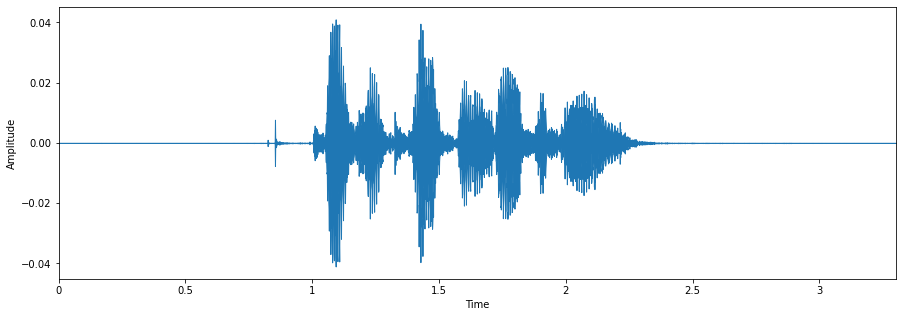

In [46]:
# Plot the waveform of the first recording

plt.figure(figsize=(15, 5))
librosa.display.waveplot(y=data, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

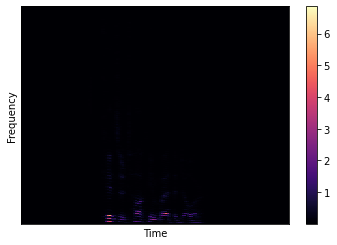

In [34]:
# short time fourier transform

stft = librosa.stft()
spectrogram = np.abs(stft)
librosa.display.specshow(spectrogram, sr=sr)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

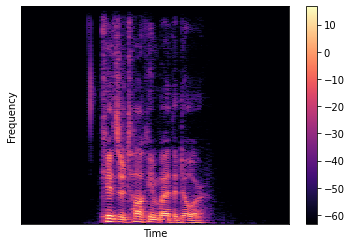

In [30]:
# log spectrogram

log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()

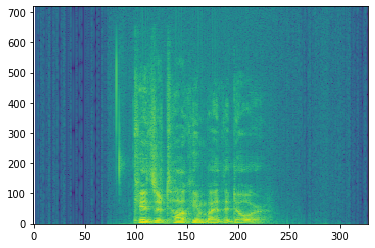

In [48]:
# https://github.com/MITESHPUTHRANNEU/Speech-Emotion-Analyzer/blob/master/final_results_gender_test.ipynb

import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


samp_rate, x = scipy.io.wavfile.read('data/03-01-01-01-01-01-01.wav')

## Parameters: 10ms step, 30ms window
nstep = int(samp_rate * 0.01)
nwin  = int(samp_rate * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [31]:
# constant-q transform (instead of stft)

librosa.cqt(y=data, sr=sr)

array([[-1.0053458e-06-1.3582038e-08j, -2.5118661e-07+5.0236207e-07j,
        -7.7287979e-07+3.3558868e-07j, ...,
        -3.8303736e-07-1.4796158e-05j, -1.4354778e-05-2.3273954e-06j,
        -4.9579658e-06+1.3474271e-05j],
       [-2.9357686e-06-1.4196180e-08j, -1.3780466e-06+3.0863980e-06j,
         3.0900298e-06+3.2959699e-06j, ...,
         3.9641986e-06-9.8185683e-06j, -8.1962580e-06-3.7324223e-06j,
        -3.1261402e-06+7.7347167e-06j],
       [ 9.2160853e-06+2.3750576e-07j,  8.6463606e-06-4.8790280e-06j,
         4.7400654e-06-1.0535669e-05j, ...,
        -7.7150080e-06+2.9201631e-06j, -5.7824091e-06+6.2698655e-06j,
        -1.4805399e-06+8.6809832e-06j],
       ...,
       [ 3.0372698e-06+9.1004573e-08j,  0.0000000e+00+0.0000000e+00j,
         2.0150715e-07+3.6221510e-07j, ...,
         3.2332935e-06+2.3031944e-06j,  2.5797697e-09-1.0109831e-08j,
         0.0000000e+00+0.0000000e+00j],
       [ 3.1370269e-06-8.9531945e-08j,  0.0000000e+00+0.0000000e+00j,
        -2.8907053e-07

In [35]:
# fft spectrum
fft = np.fft.fft(data)
fft

array([ 0.06667195+8.11850587e-16j, -0.0600817 +6.52619435e-04j,
        0.03079933-1.01554493e-02j, ...,  0.00614893-2.03039672e-02j,
        0.03079933+1.01554493e-02j, -0.0600817 -6.52619435e-04j])

In [36]:
# magnitude = contribution of each frequency to the sound
magnitude = np.abs(fft)
magnitude

array([0.06667195, 0.06008524, 0.03243042, ..., 0.02121463, 0.03243042,
       0.06008524])

In [37]:
# linspace: nr of evenly spaced nrs in an interval between 0 Hz and sr Hz
frequency = np.linspace(0, sr, len(magnitude))
frequency

array([0.00000000e+00, 3.02730755e-01, 6.05461510e-01, ...,
       2.20493945e+04, 2.20496973e+04, 2.20500000e+04])

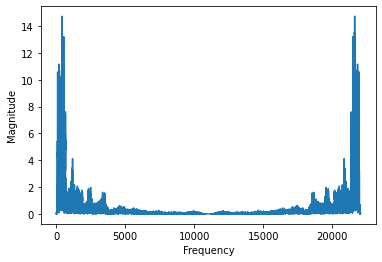

In [36]:
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

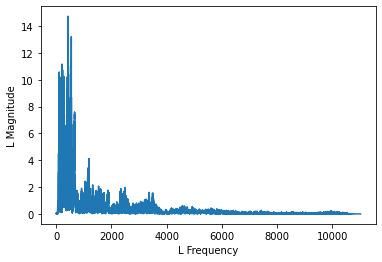

In [37]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("L Frequency")
plt.ylabel("L Magnitude")
plt.show()

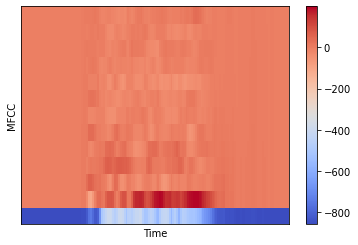

In [38]:
mfcc = librosa.feature.mfcc(y=data, n_mfcc=13)
librosa.display.specshow(mfcc, sr=sr)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [39]:
mfcc

array([[-857.30945, -857.30945, -857.30945, ..., -857.30945, -857.30945,
        -857.30945],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [59]:
PATH0 = 
PATH[0]

'03-01-04-02-01-01-04.wav'

## DATAFLAIR code

In [54]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [27]:
import soundfile

def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [28]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

observed_emotions=['neutral','calm','happy','sad','angry','fearful','disgust','surprised']

In [55]:
#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/home/lorena/Documents/bootcamp/W12/speech-emotion-recognition/data/Audio_Speech_Actors_01-24/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [56]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(203403, 2)

In [ ]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

In [ ]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

In [ ]:
#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
#DataFlair - Train the model
model.fit(x_train,y_train)

In [ ]:
#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))